In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the data done on 08-17
# data = pd.read_csv("/home/jakejoseph/Desktop/Joseph_Code/MVI_0288DLC_resnet50_RhodesInRigWithMarksAug18shuffle1_300000.csv", skiprows=3, header=None)
#Data from muscle fatigue test done on 11-09
# data = pd.read_csv("Z:/Student Folders/Jake_Joseph/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv", skiprows=3, header=None)
data = pd.read_csv("/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv", skiprows=3, header=None)

# data = pd.read_csv('/home/jakejoseph/Desktop/Joseph_Code/SLEAPV1/labels.v001.009_trim10.analysis.csv')

#independent movements data
# data = pd.read_csv("/home/jakejoseph/Desktop/Joseph_Code/FESNewCamera-Jake-2024-04-19/videos/Individual Motor Points top 03-05DLC_resnet50_FESNewCameraApr19shuffle1_56000.csv", skiprows=3, header=None)
# data = data[0:1000]

In [2]:
#Initialize variables
stimCmds  = [0, 8, 16, 24, 31, 39, 43, 47, 51, 55, 59, 67, 75, 82, 90]
stimTimes = [21, 28, 35, 41, 57, 64, 75, 81, 88, 94, 101 ,109 ,116, 124, 133, 140]
useFramesMove = [670, 889, 1073, 1246, 1725, 1944, 2275, 2470, 2665, 2855, 3072, 3304, 3517, 3745, 4036] #I think these are hand selected frames by matt for when the stim is happening?
label1 = ["Forearm", "Wrist", "Hand", "MCP", "PIP", "DIP"]
label2 = ["x", "y", "likelihood"]
videoHeight = 720
fps = 29.97
threshold = 0.75
window = 10
#flip y pixels
# data.iloc[:,2::3] = videoHeight - data.iloc[:,2::3]  #not used

In [5]:
#moving average
for i in range(1, len(data.columns),3):
    x = data.columns[i]
    y = data.columns[i+1]

    x_ma = data[x].rolling(window=window, min_periods=1).mean()
    y_ma = data[y].rolling(window=window, min_periods=1).mean()

    data[x] = x_ma
    data[y] = y_ma
    
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,526.659241,406.261230,0.913010,560.164185,452.072662,0.857745,680.277649,464.283813,0.857281,892.101868,272.101196,0.940854,923.448975,77.449730,0.939611
1,1,526.383148,405.968872,0.919322,560.164185,452.072662,0.845178,680.277649,464.283813,0.854380,891.703949,272.147705,0.943259,923.445251,77.658703,0.908831
2,2,526.213603,405.807485,0.934166,560.164185,452.072662,0.869647,680.277649,464.283813,0.882482,891.359456,271.702372,0.954656,923.337179,77.470673,0.922121
3,3,526.027115,405.625389,0.945851,560.164185,452.072662,0.842314,680.277649,464.283813,0.835458,890.954315,271.482491,0.965645,923.751999,77.039722,0.924855
4,4,525.870557,405.496991,0.950284,560.164185,452.072662,0.821277,680.277649,464.283813,0.861589,890.926257,271.291461,0.951316,923.726111,77.084532,0.921467


In [2]:
def interpolate(df, x, y, likelihood):
    for i in range(1, len(df)):
        if df.iloc[i, likelihood] < threshold:
            df.iloc[i, x] = df.iloc[i-1, x]
            df.iloc[i, y] = df.iloc[i-1, y]

threshold = 0.90
for i in range(1,len(data.columns),3):
    likelihood = i + 2  
    x_col = i  
    y_col = i + 1  
    interpolate(data, x_col, y_col, likelihood)
data.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,526.659241,406.261230,0.913010,560.164185,452.072662,0.857745,680.277649,464.283813,0.857281,892.101868,272.101196,0.940854,923.448975,77.449730,0.939611
1,1,526.107056,405.676514,0.919322,560.164185,452.072662,0.845178,680.277649,464.283813,0.854380,891.306030,272.194214,0.943259,923.441528,77.867676,0.908831
2,2,525.874512,405.484711,0.934166,560.164185,452.072662,0.869647,680.277649,464.283813,0.882482,890.670471,270.811707,0.954656,923.121033,77.094612,0.922121
3,3,525.467651,405.079102,0.945851,560.164185,452.072662,0.842314,680.277649,464.283813,0.835458,889.738892,270.822845,0.965645,924.996460,75.746872,0.924855
4,4,525.244324,404.983398,0.950284,560.164185,452.072662,0.821277,680.277649,464.283813,0.861589,890.814026,270.527344,0.951316,923.622559,77.263771,0.921467


In [31]:
def calculate_angle(p1,p2, p3):
    #Calculate the angle at p2
    #Calculate the vectors
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    #Calculate the angle
    angle = np.arccos(np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    #Convert to degrees
    angle = np.degrees(angle)

    return angle

calculate_angle((1,0),(0,0),(0.5,0.5)) #output should be 45 degrees

45.00000000000001

In [131]:
def calculate_angle_with_uncertainty(p1, p2, p3, sigma_mag):
    # Calculate vectors
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)

    # Calculate dot product and magnitudes
    a_dot_b = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)

    # Calculate cosine of the angle
    cos_theta = a_dot_b / (norm_v1 * norm_v2)

    # Calculate the angle in radians
    angle = np.arccos(cos_theta)

    # Convert the angle to degrees
    angle_degrees = np.degrees(angle)

    # Calculate partial derivatives for error propagation
    partial_a_dot_b = 1 / (norm_v1 * norm_v2)
    partial_norm_v1 = -a_dot_b / (norm_v1**2 * norm_v2)
    partial_norm_v2 = -a_dot_b / (norm_v1 * norm_v2**2)

    # Propagate the errors
    sigma_cos_theta = np.sqrt((partial_a_dot_b * sigma_mag)**2 +
                              (partial_norm_v1 * sigma_mag)**2 +
                              (partial_norm_v2 * sigma_mag)**2)

    # Calculate uncertainty in theta using derivative of arccos
    sigma_theta = sigma_cos_theta / np.sqrt(1 - cos_theta**2)

    # Convert uncertainty from radians to degrees
    sigma_theta_degrees = np.degrees(sigma_theta)

    return angle_degrees, sigma_theta_degrees

In [6]:
wristAngle = []
uns = []
for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    wrist = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    mcp = (data.iloc[i][data.columns[7]], data.iloc[i][data.columns[8]])
    pip = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    dip = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    angle, un = calculate_angle_with_uncertainty(forearm, wrist, dip, (0.2*79.5))
    wristAngle.append(angle)
    uns.append(un)


NameError: name 'calculate_angle_with_uncertainty' is not defined

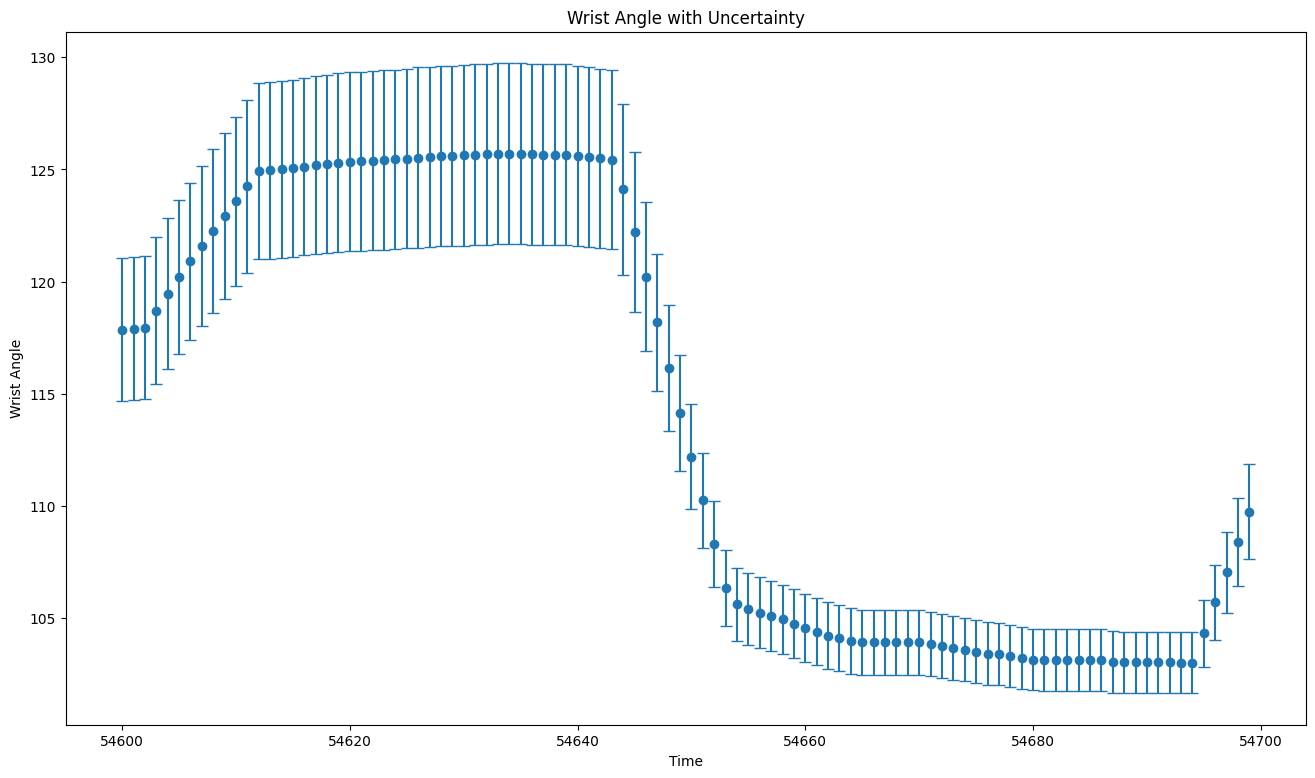

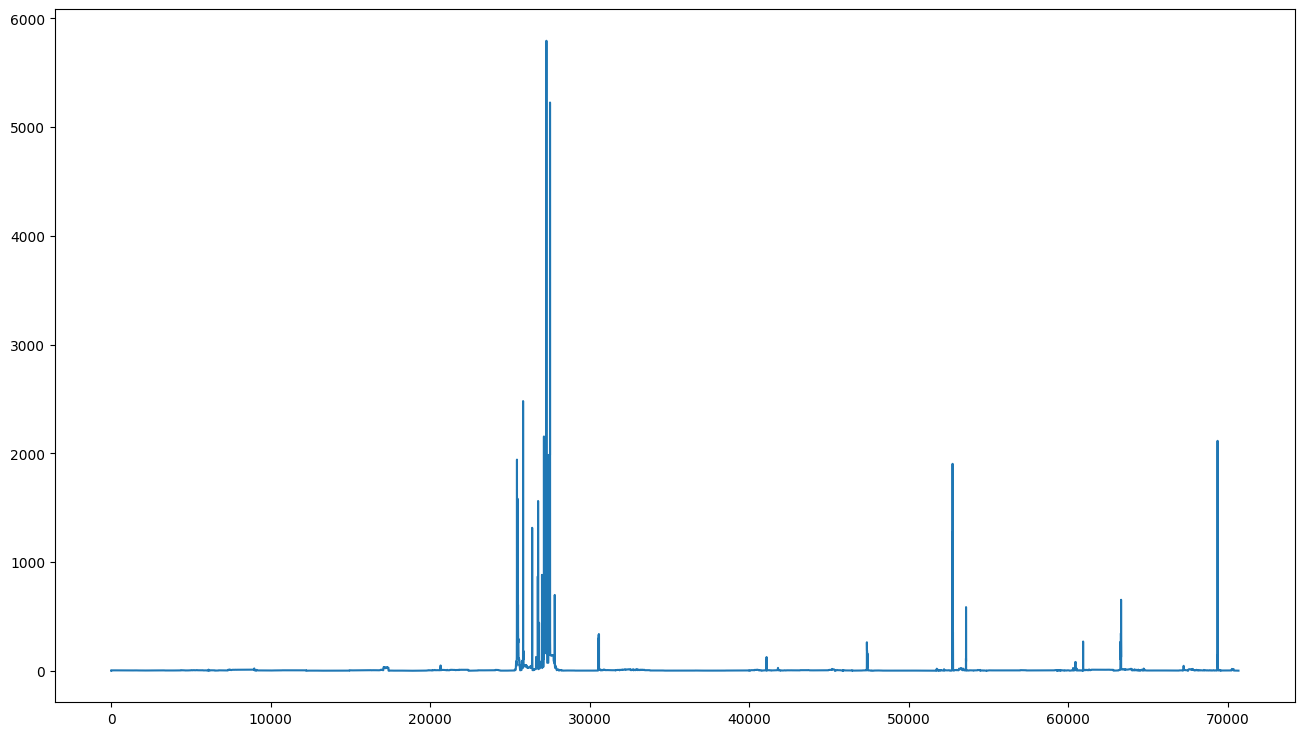

In [142]:
# Plotting the wrist angle with uncertainty as confidence intervals
plt.errorbar(range(len(wristAngle))[54600:54700], wristAngle[54600:54700], yerr=uns[54600:54700], fmt='o', capsize=4)
plt.xlabel('Time')
plt.ylabel('Wrist Angle')
plt.title('Wrist Angle with Uncertainty')
plt.show()
plt.plot(uns)


In [27]:
wrist_likelihood = (data.iloc[:][data.columns[3]] + data.iloc[:][data.columns[6]] + data.iloc[:][data.columns[12]])/3
mcp_likelihood = (data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[15]] + data.iloc[:][data.columns[6]])/3
pip_likelihood = (data.iloc[:][data.columns[18]] + data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[15]])/3

In [7]:
#run this for original matt data
wristAngle = []
mcpAngle = []
pipAngle = []
for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    wrist = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    mcp = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    pip = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    dip = (data.iloc[i][data.columns[16]], data.iloc[i][data.columns[17]])
    wristAngle.append(calculate_angle(forearm, wrist, mcp))
    mcpAngle.append(calculate_angle(wrist, mcp, pip))
    pipAngle.append(calculate_angle(mcp, pip, dip))

IndexError: index 16 is out of bounds for axis 0 with size 16

In [22]:
from scipy.io import loadmat

data = loadmat('/home/jakejoseph/Desktop/Joseph_Code/mattAngles.mat')
wa = data['wa']
pa = data['pa']
ma = data['fa']
stimTimes = data['stimTimes']

print(stimTimes[0])


[ 21  28  35  41  57  64  75  81  88  94 101 109 116 124 133 140]


In [23]:
stimTimes = stimTimes[0]
scaledStimTimes = [x*30 for x in stimTimes]
print(scaledStimTimes)

[630, 840, 1050, 1230, 1710, 1920, 2250, 2430, 2640, 2820, 3030, 3270, 3480, 3720, 3990, 4200]


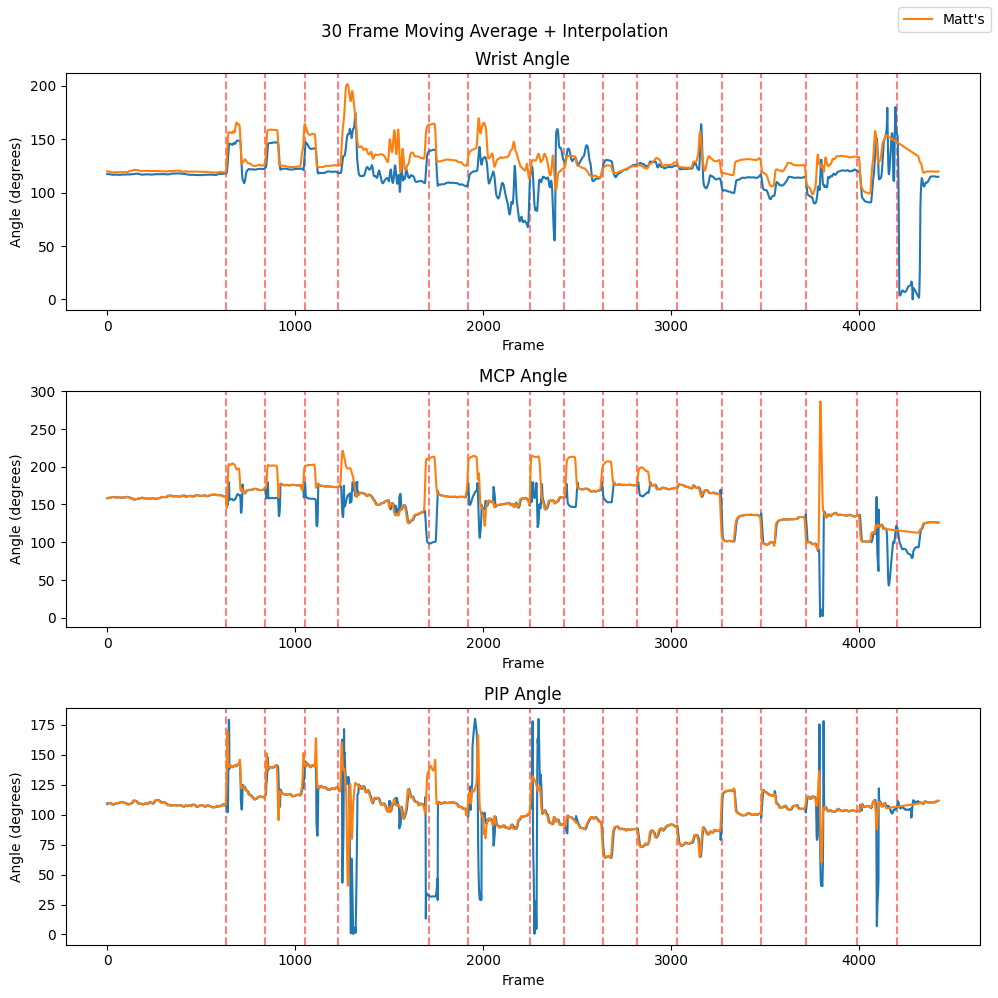

In [32]:
#Plotting Angles over Time
fig, axs = plt.subplots(3,1, figsize=(10,10))

for time in scaledStimTimes:
    axs[0].axvline(x=time,color='r', ls = '--' , alpha=0.5)
    axs[1].axvline(x=time, ls = '--',color='r', alpha=0.5)
    axs[2].axvline(x=time, ls = '--' ,color='r',alpha=0.5)


axs[0].plot(wristAngle)
axs[0].plot(wa[0], label="Matt's")
axs[0].set_title("Wrist Angle")
axs[0].set_xlabel("Frame")
axs[0].set_ylabel("Angle (degrees)")

axs[1].plot(mcpAngle)
axs[1].plot(ma[0])
axs[1].set_title("MCP Angle")
axs[1].set_xlabel("Frame")
axs[1].set_ylabel("Angle (degrees)")

axs[2].plot(pipAngle)
axs[2].plot(pa[0])
axs[2].set_title("PIP Angle")
axs[2].set_xlabel("Frame")
axs[2].set_ylabel("Angle (degrees)")
fig.suptitle("30 Frame Moving Average + Interpolation")
fig.legend()
plt.tight_layout()
plt.show()



In [8]:
wrist_likelihood = (data.iloc[:][data.columns[9]] + data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[15]])/3
mcp_likelihood = (data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[9]] + data.iloc[:][data.columns[6]])/3
pip_likelihood = (data.iloc[:][data.columns[9]] + data.iloc[:][data.columns[6]] + data.iloc[:][data.columns[3]])/3


# Create a custom colormap from green to red
colors = [(1, 0, 0), (0, 1, 0)]  # Green to Red
n_bins = 100  # Discretizes the interpolation into bins
# cmap = LinearSegmentedColormap.from_list("GreenRed", colors, N=n_bins) #use seaborn color palette or matplotlib color palette
cmap = 'plasma'
print(pip_likelihood)

0       0.876012
1       0.872960
2       0.895432
3       0.874541
4       0.877716
          ...   
9581    0.970702
9582    0.958493
9583    0.956337
9584    0.940079
9585    0.965100
Length: 9586, dtype: float64


In [13]:
wristAngle = []
mcpAngle = []
pipAngle = []
for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    wrist = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    mcp = (data.iloc[i][data.columns[7]], data.iloc[i][data.columns[8]])
    pip = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    dip = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    wristAngle.append(calculate_angle(forearm, wrist, mcp))
    mcpAngle.append(calculate_angle(wrist, mcp, dip))
    pipAngle.append(calculate_angle(mcp, pip, dip))

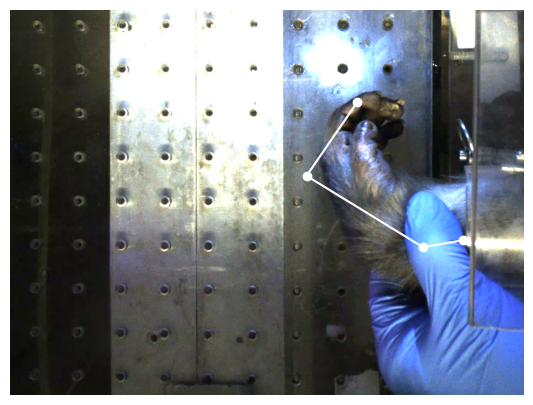

In [35]:
# Path to your video file
video_path = "/home/jakejoseph/Desktop/Joseph_Code/trimmed_videos/top.mp4"

# Open the video
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file")

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

# Set the desired frame index
frame_index = 54660

# Set the video capture object to the desired frame
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

# Read the frame
ret, frame = cap.read()

# Convert frame from BGR to RGB (for correct matplotlib colors)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Here, implement the logic to extract your points for the current frame
forearm = (data.iloc[frame_index][data.columns[13]], data.iloc[frame_index][data.columns[14]])
wrist = (data.iloc[frame_index][data.columns[10]], data.iloc[frame_index][data.columns[11]])
mcp = (data.iloc[frame_index][data.columns[7]], data.iloc[frame_index][data.columns[8]])
pip = (data.iloc[frame_index][data.columns[4]], data.iloc[frame_index][data.columns[5]])
dip = (data.iloc[frame_index][data.columns[1]], data.iloc[frame_index][data.columns[2]])

# Unpack the points into x and y coordinates
x = [forearm[0], wrist[0], mcp[0], dip[0]]
y = [forearm[1], wrist[1], mcp[1], dip[1]]

# Plotting on the frame
ax.imshow(frame_rgb)
ax.plot(x, y, marker='o', c='white')  # Plot with white color for visibility
ax.axis('off')  # Turn off axis
# Save the figure as SVG
fig.savefig('/home/jakejoseph/Desktop/Joseph_Code/overlaid.png', format='png')
fig.savefig('/home/jakejoseph/Desktop/Joseph_Code/overlaid.svg', format='svg')

# Display the frame
plt.show()

# Release the video capture object
cap.release()



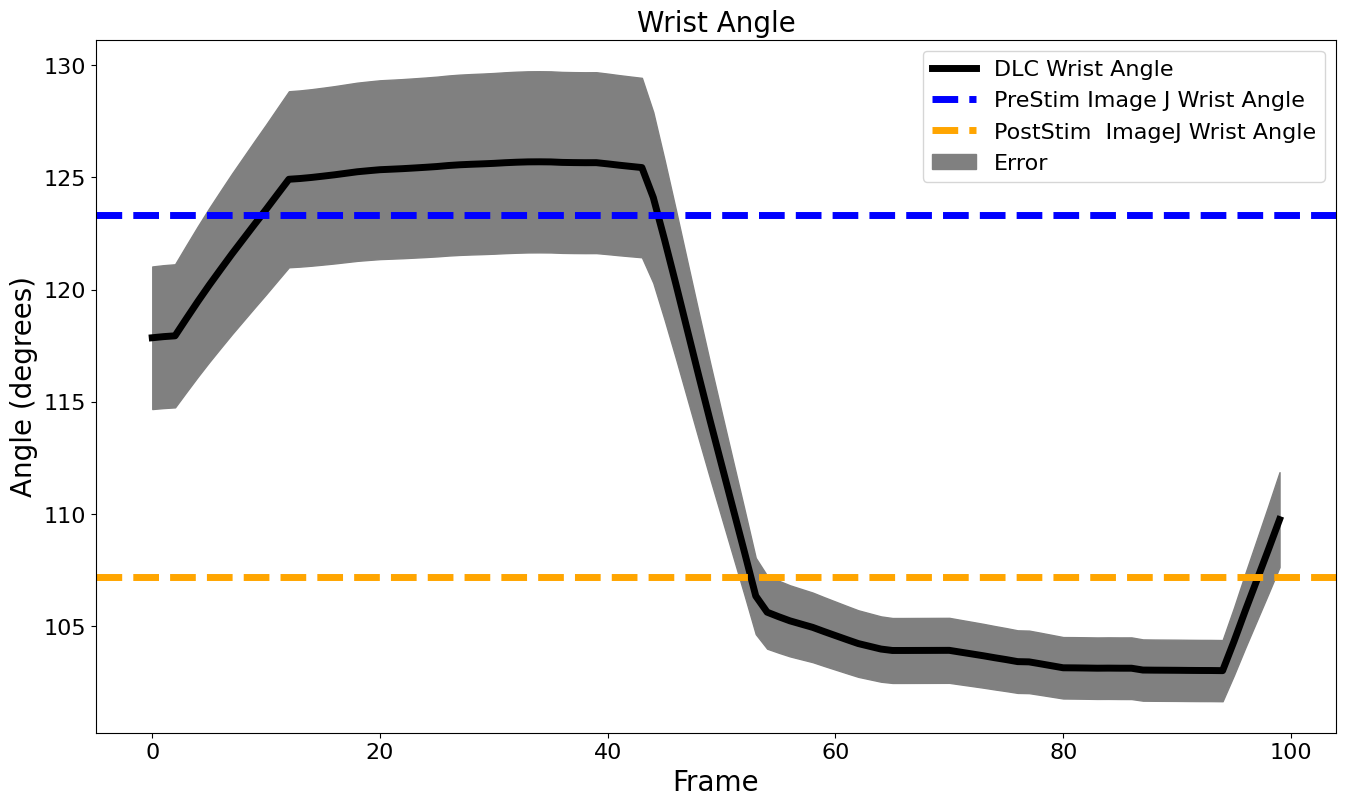

In [161]:
wristAngle_arr = np.array(wristAngle[54600:54700])
uns_arr = np.array(uns[54600:54700])
x = list(range(len(wristAngle[54600:54700])))

plt.plot(wristAngle[54600:54700], label = 'DLC Wrist Angle', color='black',linewidth=5)
plt.axhline(123.319, color='b', label = 'PreStim Image J Wrist Angle', ls = '--', linewidth=5)
plt.axhline(107.198, color='orange', label = 'PostStim  ImageJ Wrist Angle', ls = '--', linewidth=5)
plt.fill_between(x, wristAngle_arr - uns_arr, wristAngle_arr + uns_arr, color='grey', label='Error')
plt.title("Wrist Angle", fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.ylabel("Angle (degrees)", fontsize=20)
plt.xlabel("Frame", fontsize=20)
plt.legend(fontsize=16)
plt.savefig('/home/jakejoseph/Desktop/Joseph_Code/wristAngle.svg')
plt.show()


In [39]:
def distance(p1x,p1y,p2x,p2y,frame):
    return np.sqrt((p1x[frame] - p2x[frame])**2 + (p1y[frame] - p2y[frame])**2)

print(distance(wristX, wristY, forearmX, forearmY, 54600))
print(distance(dipX, dipY, wristX, wristY, 54600))
print(calculate_angle((forearmX[27510],forearmY[27510]), (wristX[27510],wristY[27510]), (dipX[27510],dipY[27510])))
print(calculate_angle((forearmX[28000],forearmY[28000]), (wristX[28000],wristY[28000]), (dipX[27630],dipY[28000])))

1.96291615656707
7.97629923476094
179.86719263046086
141.53120685062524


In [60]:
((1*60)+38)*30

2940

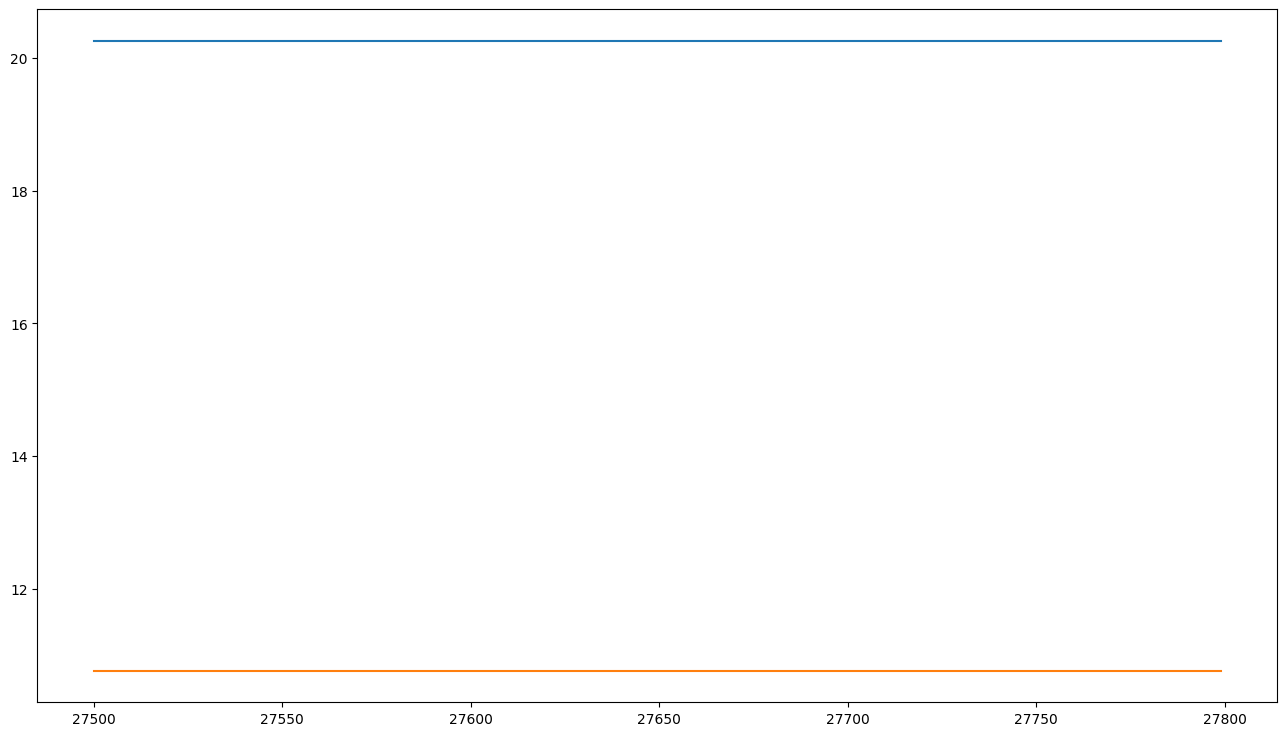

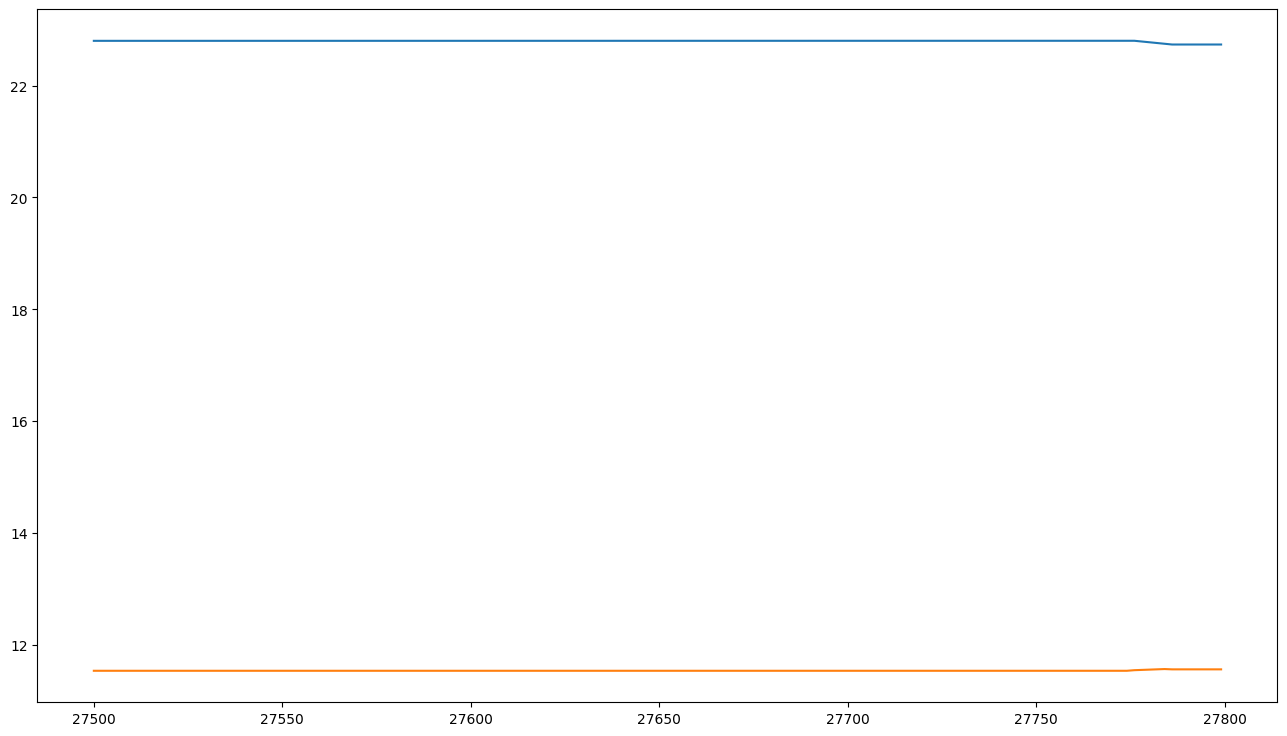

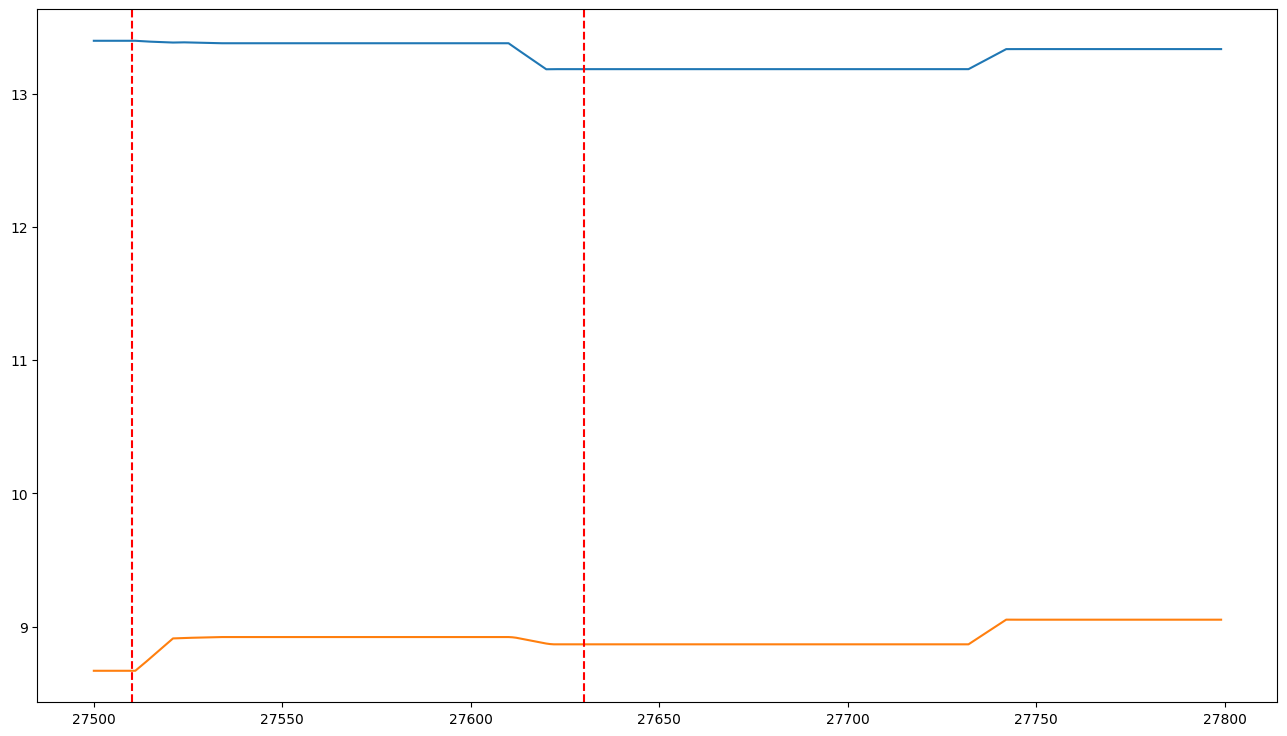

In [36]:
forearmX = data.iloc[:][data.columns[13]]
forearmY = data.iloc[:][data.columns[14]]
wristX = data.iloc[:][data.columns[10]]
wristY = data.iloc[:][data.columns[11]]
dipX = data.iloc[:][data.columns[1]]
dipY = data.iloc[:][data.columns[2]]
pipX = data.iloc[:][data.columns[4]]
pipY = data.iloc[:][data.columns[5]]
mcpX = data.iloc[:][data.columns[7]]
mcpY = data.iloc[:][data.columns[8]]

forearmY = forearmY * (1/79.5) # pixel to cm
forearmX = forearmX * (1/79.5) # pixel to cm
wristY = wristY * (1/79.5) # pixel to cm
wristX = wristX * (1/79.5) # pixel to cm
dipY = dipY * (1/79.5) # pixel to cm
dipX = dipX * (1/79.5) # pixel to cm
pipY = pipY * (1/79.5) # pixel to cm
pipX = pipX * (1/79.5) # pixel to cm
mcpY = mcpY * (1/79.5) # pixel to cm
mcpX = mcpX * (1/79.5) # pixel to cm

plt.plot(wristX[27500:27800])
plt.plot(wristY[27500:27800])
plt.show()

plt.plot(forearmX[27500:27800])
plt.plot(forearmY[27500:27800])
plt.show()

plt.plot(dipX[27500:27800])
plt.plot(dipY[27500:27800])
plt.axvline(x=27510, color='r', ls='--')
plt.axvline(x=27630, color='r', ls='--')
plt.show()

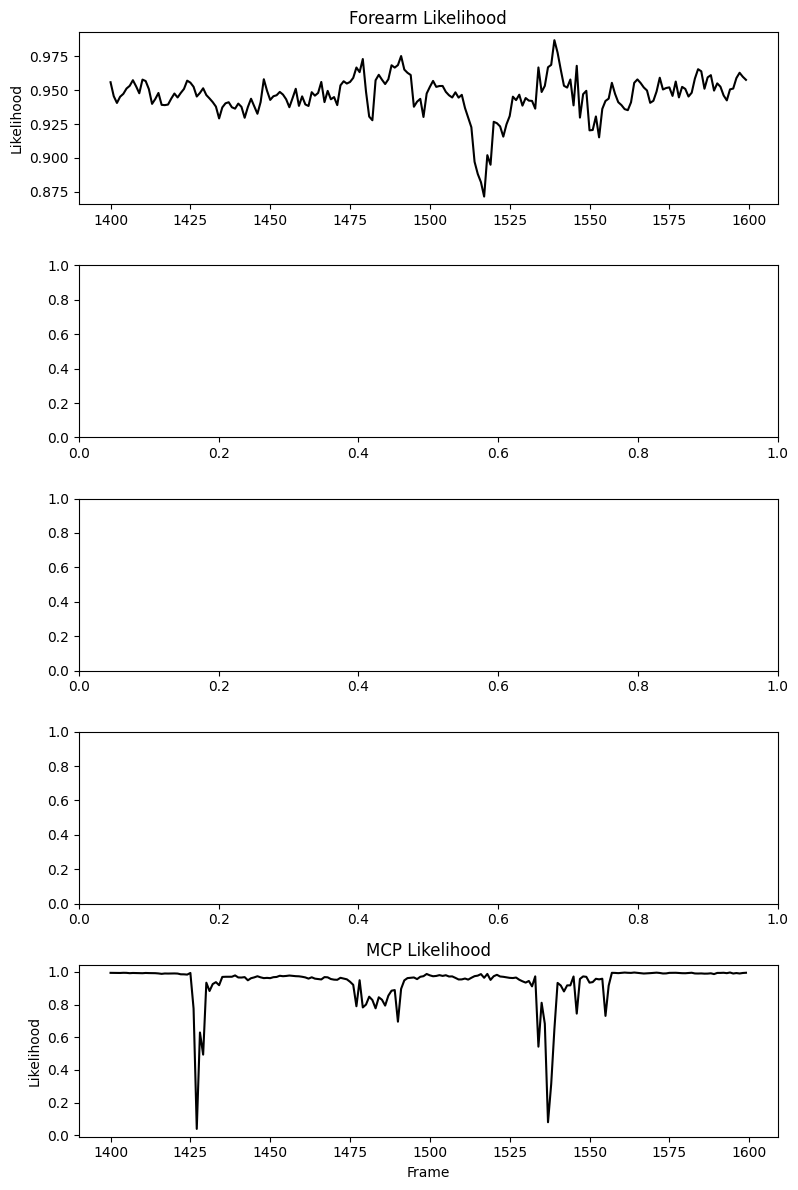

In [25]:
forearmX = data.iloc[:][data.columns[13]]
forearmY = data.iloc[:][data.columns[14]]
wristX = data.iloc[:][data.columns[10]]
wristY = data.iloc[:][data.columns[11]]
dipX = data.iloc[:][data.columns[1]]
dipY = data.iloc[:][data.columns[2]]
pipX = data.iloc[:][data.columns[4]]
pipY = data.iloc[:][data.columns[5]]
mcpX = data.iloc[:][data.columns[7]]
mcpY = data.iloc[:][data.columns[8]]

forearmLikelihood = data.iloc[:][data.columns[15]]
wristLikelihood = data.iloc[:][data.columns[12]]
dipLikelihood = data.iloc[:][data.columns[3]]
pipLikelihood = data.iloc[:][data.columns[6]]
mcpLikelihood = data.iloc[:][data.columns[9]]

import matplotlib.pyplot as plt

# Create a figure and 5 subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 12))

# Plot data on each subplot
axs[0].plot(forearmLikelihood[1400:1600], label = 'Forearm', color='black')
axs[0].set_title('Forearm Likelihood')
axs[0].set_ylabel('Likelihood')

# axs[1].plot(wristLikelihood, label = 'Wrist', color='black')
# axs[1].set_title('Wrist Likelihood')
# axs[1].set_ylabel('Likelihood')

# axs[2].plot(dipLikelihood, label = 'DIP', color='black')
# axs[2].set_title('DIP Likelihood')
# axs[2].set_ylabel('Likelihood')

# axs[3].plot(pipLikelihood, label = 'PIP', color='black')
# axs[3].set_title('PIP Likelihood')
# axs[3].set_ylabel('Likelihood')

axs[4].plot(mcpLikelihood[1400:1600], label = 'MCP', color='black')
axs[4].set_title('MCP Likelihood')
axs[4].set_ylabel('Likelihood')
axs[4].set_xlabel('Frame')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


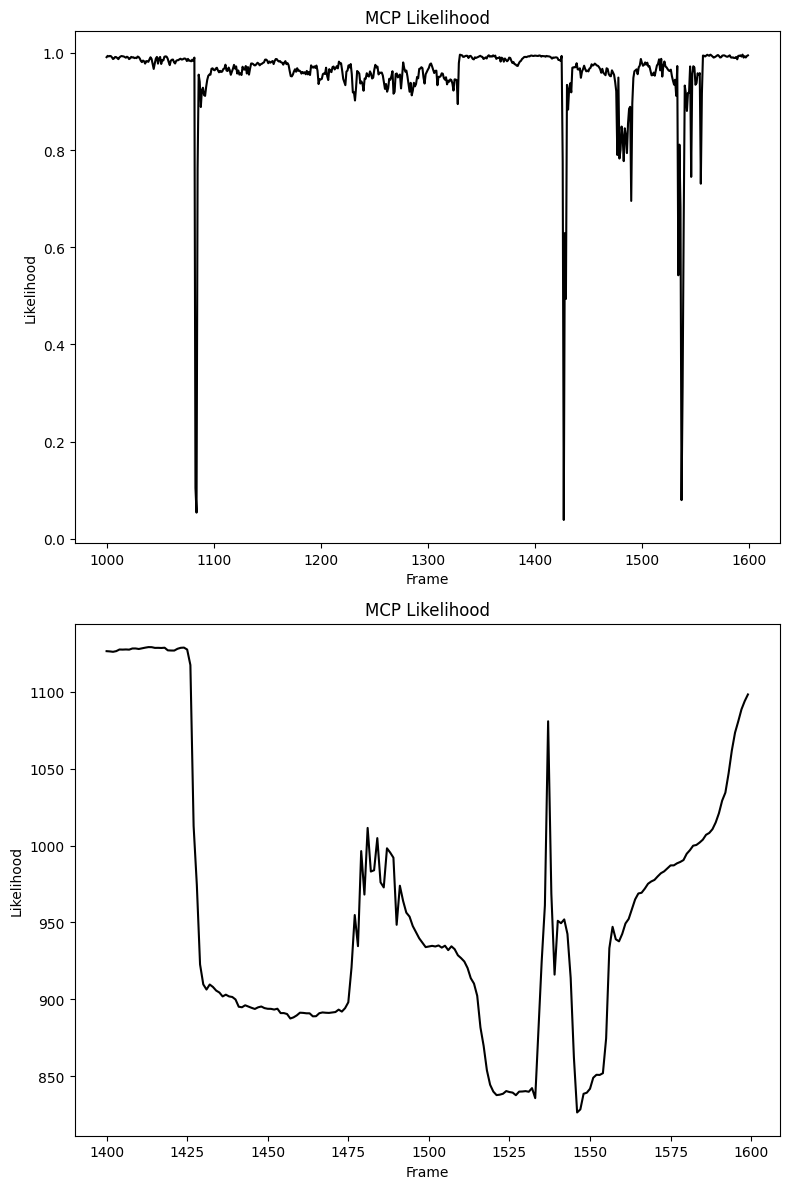

In [29]:
#  Create a figure and 5 subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Plot data on each subplot
axs[0].plot(mcpLikelihood[1000:1600], label = 'MCP', color='black')
axs[0].set_title('MCP Likelihood')
axs[0].set_ylabel('Likelihood')
axs[0].set_xlabel('Frame')


axs[1].plot(mcpX[1400:1600], label = 'MCP', color='black')
axs[1].set_title('MCP Likelihood')
axs[1].set_ylabel('Likelihood')
axs[1].set_xlabel('Frame')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


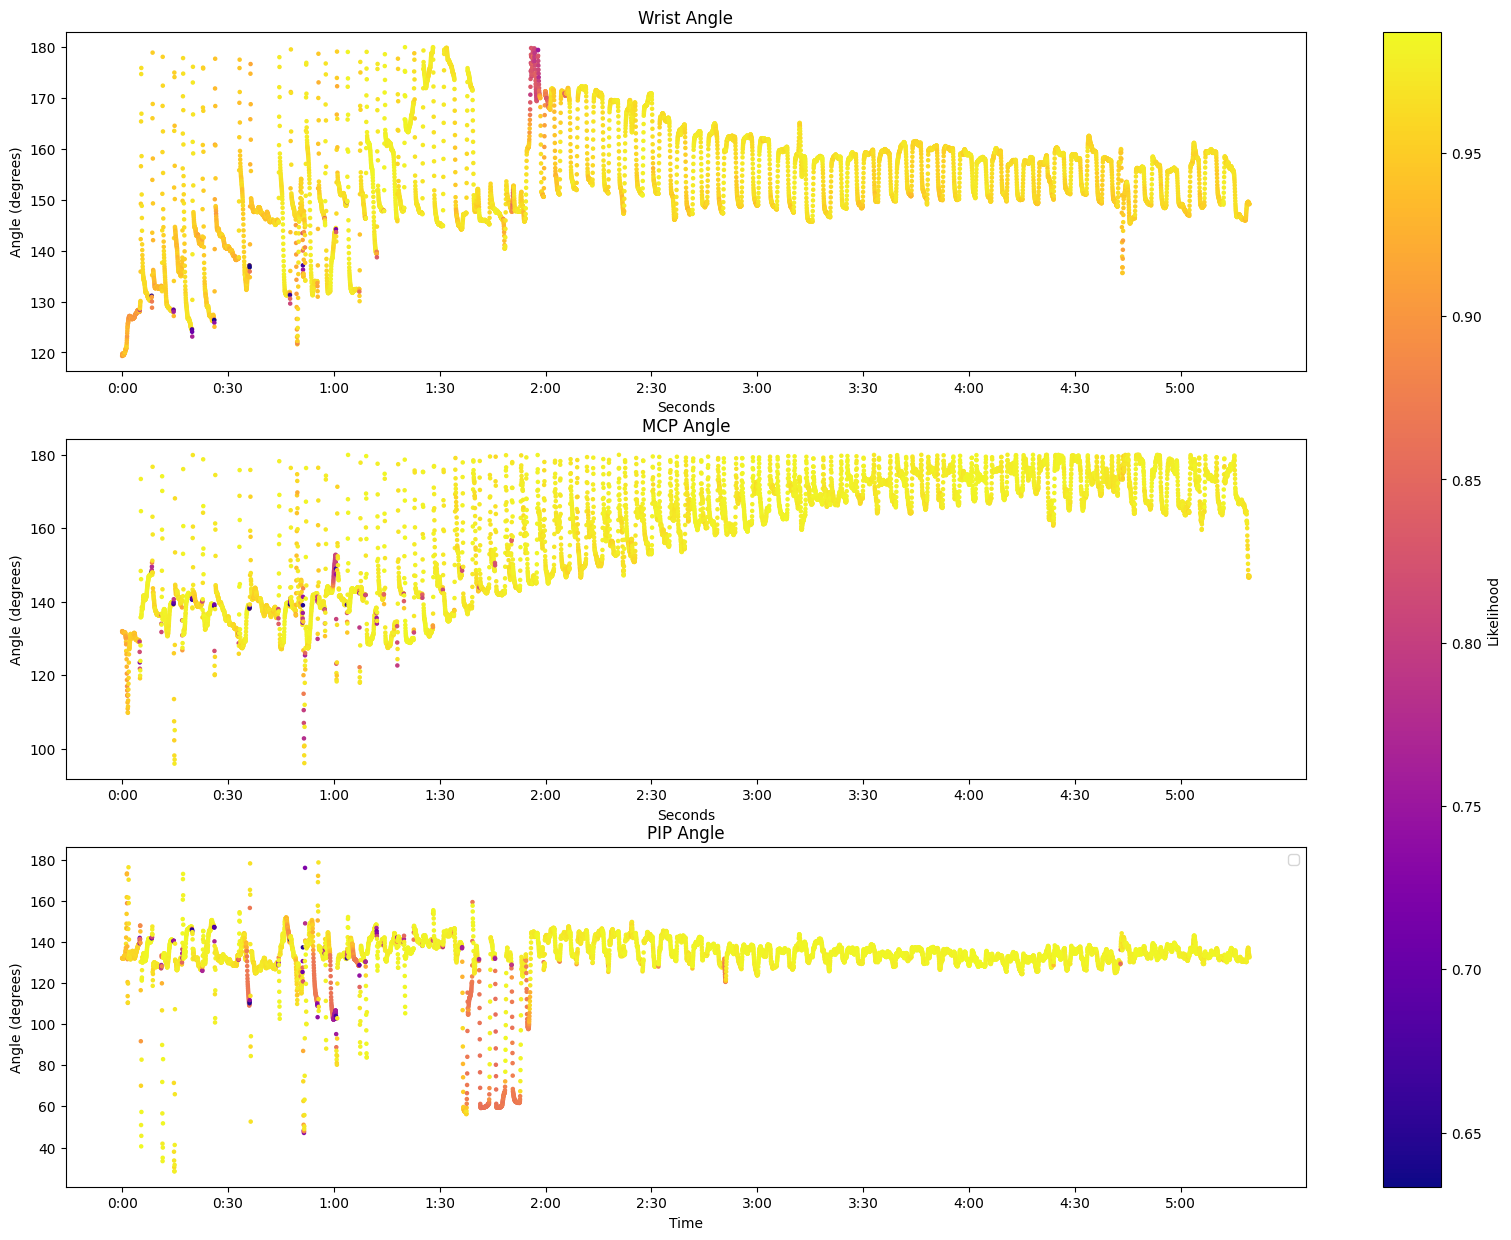

In [12]:
#Plotting Angles over Time

# Time array (in seconds)
time = np.arange(len(wristAngle)) / 30
# Convert time to minutes:seconds format
time_labels = [f'{int(t // 60)}:{int(t % 60):02d}' for t in time]

slice_interval = 30 # seconds
slicing_indices = np.arange(0, len(time), slice_interval * 30).astype(int)

fig, axs = plt.subplots(3,1, figsize=(20,15))

scatter1 = axs[0].scatter(time,wristAngle, c = wrist_likelihood,cmap = cmap,s=5)
axs[0].set_title("Wrist Angle")
axs[0].set_xlabel("Seconds")
axs[0].set_ylabel("Angle (degrees)")
axs[0].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])
# plt.colorbar()


axs[1].scatter(time,mcpAngle, c = mcp_likelihood,cmap = cmap,s=5)
axs[1].set_title("MCP Angle")
axs[1].set_xlabel("Seconds")
axs[1].set_ylabel("Angle (degrees)")
axs[1].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])


axs[2].scatter(time,pipAngle, c = pip_likelihood,cmap = cmap,s=5)
axs[2].set_title("PIP Angle")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Angle (degrees)")
axs[2].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])
# axs[2].fill_between(time, min(pipAngle), max(pipAngle), where=(time >= 110) & (time <= 140), color='grey', alpha=0.3, label='Camera Shift')
plt.legend()
cbar = fig.colorbar(scatter1, ax=axs)
cbar.set_label('Likelihood')
# fig.suptitle("Muscle Fatigue Test")
# plt.tight_layout()

plt.show()

0.5555555555555556

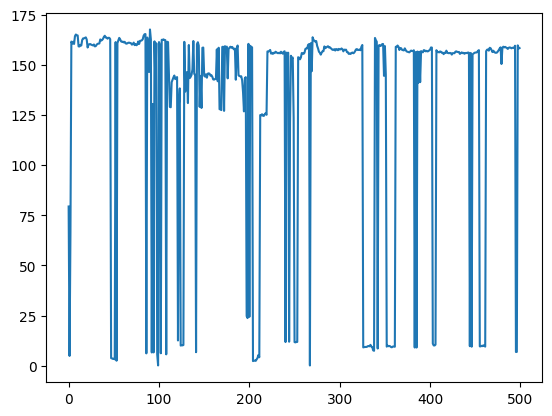

In [43]:
plt.plot(wristAngle[0:500])
len(wristAngle)/30/60

In [10]:
# Time array (in seconds)
time = np.arange(len(wristAngle)) / 30

# Convert time to minutes:seconds format
time_labels = [f'{int(t // 60)}:{int(t % 60):02d}' for t in time]

# Calculate slicing indices
slicing_indices = [0]  # Start with the 0 second index
n = 0
while True:
    next_index = int((30 * n) * fps)  # The corrected formula
    if next_index >= len(time):
        break
    slicing_indices.append(next_index)
    n += 1
slicing_indices = np.array(slicing_indices)


# def frame_to_time_mm_ss(frame, fps=30):
#     total_seconds = frame / fps
#     minutes = int(total_seconds // 60)
#     seconds = int(total_seconds % 60)
#     return f"{minutes:02d}:{seconds:02d}"

# time_labels_mm_ss = [frame_to_time_mm_ss(frame) for frame in time]

In [42]:
# Time array (in seconds)
time = (np.arange(len(wristAngle)) / 30) +1
# Convert time to minutes:seconds format
time_labels = [f'{int(t // 60)}:{int(t % 60):02d}' for t in time]

slice_interval = 30 # seconds
slicing_indices = np.arange(0, len(time), slice_interval * 30).astype(int)

In [49]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(time, mcpAngle)
line_of_best_fit = slope * time + intercept
print(slope, intercept, r_value, p_value, std_err)

0.14729154588945462 134.51568426828493 0.8507705154500278 0.0 0.0009293848588494236


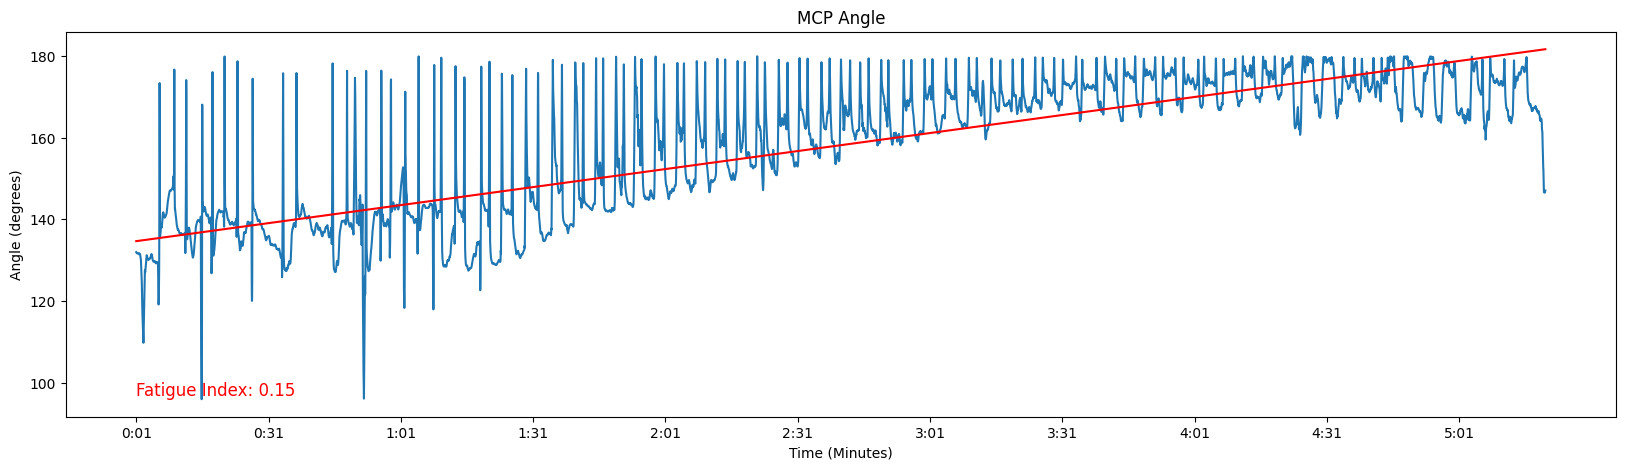

In [50]:
plt.figure(figsize=(20,5))
plt.plot(time,mcpAngle)
plt.title("MCP Angle")
plt.xlabel("Time (Minutes)")
plt.ylabel("Angle (degrees)")
plt.xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])
plt.plot(time, line_of_best_fit, label=f'Best Fit Line\nSlope: {slope:.2f}', color='red')
plt.text(1, min(mcpAngle), f'Fatigue Index: {slope:.2f}', fontsize=12, verticalalignment='bottom', color='red')
# plt.savefig('MCP.svg', format='svg')
plt.show()


In [ ]:
# Taking a 1 second window around each stim command (30 fps)
wristStim = [np.mean(wristAngle[max(i-15, 0):min(i+15, len(wristAngle))]) for i in useFramesMove]
mcpStim = [np.mean(mcpAngle[max(i-15, 0):min(i+15, len(mcpAngle))]) for i in useFramesMove]
pipStim = [np.mean(pipAngle[max(i-15, 0):min(i+15, len(pipAngle))]) for i in useFramesMove]


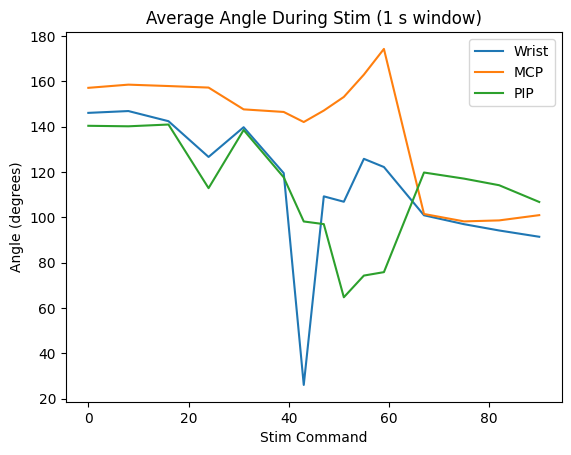

In [ ]:
plt.plot(stimCmds, wristStim, label="Wrist")
plt.plot(stimCmds, mcpStim, label="MCP")
plt.plot(stimCmds, pipStim, label="PIP")
plt.legend()
plt.xlabel("Stim Command")
plt.ylabel("Angle (degrees)")
plt.title("Average Angle During Stim (1 s window)")
plt.show()

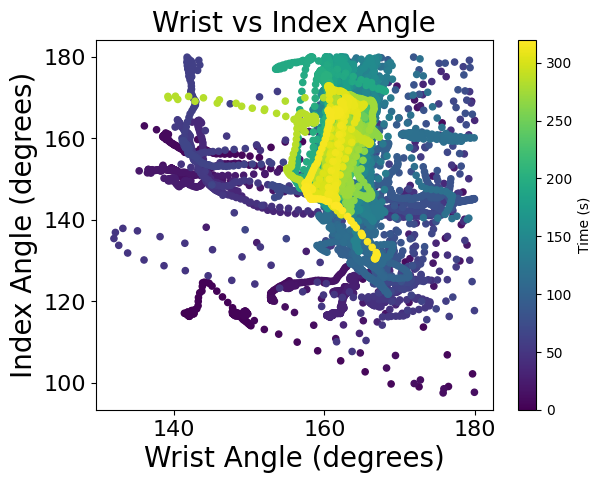

In [25]:
colour = np.arange(len(wristAngle)) / 30
plt.scatter(wristAngle,mcpAngle, c = colour, cmap = 'viridis',s=20)
plt.colorbar(label = 'Time (s)')
plt.xlabel("Wrist Angle (degrees)", fontsize=20)
plt.ylabel("Index Angle (degrees)", fontsize=20)
plt.title("Wrist vs Index Angle", fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.savefig('/home/jakejoseph/Desktop/Joseph_Code/wrist_vs_index.svg')
plt.show()
# print(len(pipAngle))
# print(len(mcpAngle))


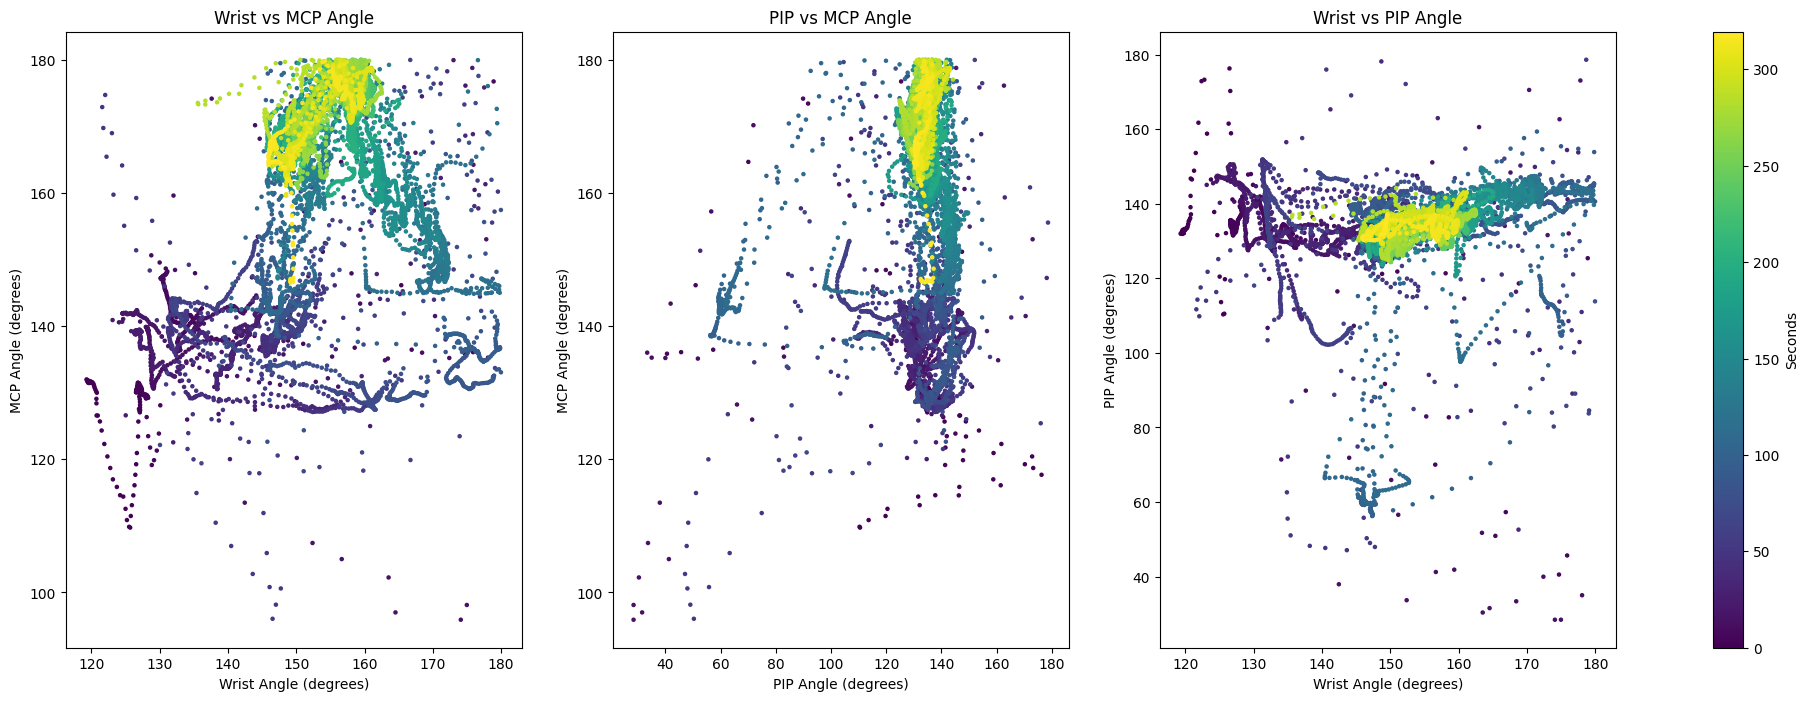

In [14]:
fig, axs = plt.subplots(1,3, figsize=(25,8))

scatter1 = axs[0].scatter(wristAngle,mcpAngle, c =np.arange(len(wristAngle)) / 30, cmap = 'viridis',s=5 )
axs[0].set_title("Wrist vs MCP Angle")
axs[0].set_xlabel("Wrist Angle (degrees)")
axs[0].set_ylabel("MCP Angle (degrees)")

axs[1].scatter(pipAngle,mcpAngle, c =np.arange(len(wristAngle)) / 30, cmap = 'viridis',s=5 )
axs[1].set_title("PIP vs MCP Angle")
axs[1].set_xlabel("PIP Angle (degrees)")
axs[1].set_ylabel("MCP Angle (degrees)")

axs[2].scatter(wristAngle,pipAngle, c =np.arange(len(wristAngle)) / 30, cmap = 'viridis',s=5 )
axs[2].set_title("Wrist vs PIP Angle")
axs[2].set_xlabel("Wrist Angle (degrees)")
axs[2].set_ylabel("PIP Angle (degrees)")

cbar = fig.colorbar(scatter1, ax=axs)
cbar.set_label('Seconds')

plt.show()

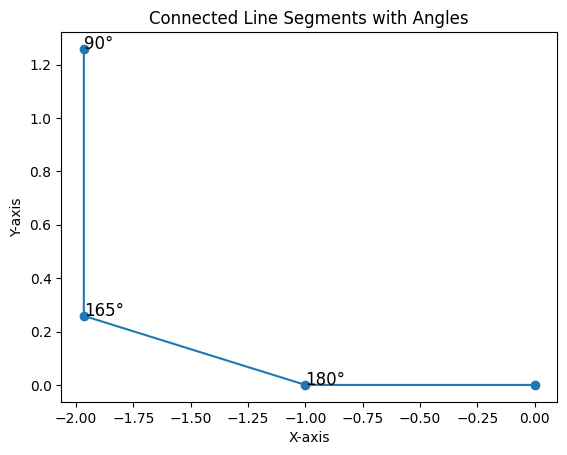

In [60]:
# trying to plot angles on a skeleton

angles_degrees = [180, 165, 90]
angles_radians = [np.radians(x) for x in angles_degrees]
x=[0]
y=[0]

for angle in angles_radians:
    x.append(x[-1] + np.cos(angle))
    y.append(y[-1] + np.sin(angle))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the line segments
ax.plot(x, y, marker='o')

# Add labels to the angles
for i, angle in enumerate(angles_degrees):
    ax.text(x[i+1], y[i+1], f'{angle}°', fontsize=12)

# Add titles and labels
ax.set_title('Connected Line Segments with Angles')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.show()


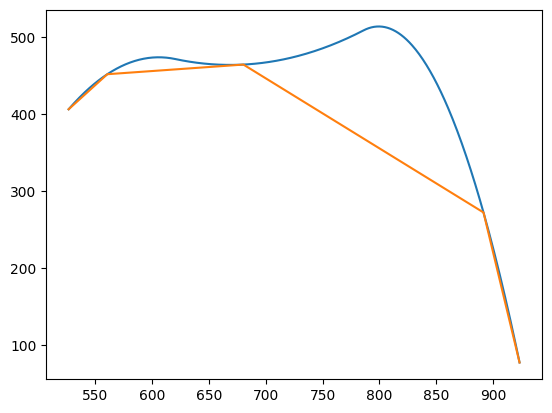

In [20]:
from scipy.interpolate import interp1d
x = data.iloc[1, 1::3]
y = data.iloc[1, 2::3]
f = interp1d(x, y, kind='quadratic')
x_smooth = np.linspace(min(x), max(x), 500)
y_smooth = f(x_smooth)
plt.plot(x_smooth,y_smooth)
plt.plot(x,y)
# ax.set_xlim([x.iloc[-1]+500, x.iloc[-1]-500])
# ax.set_ylim([y.iloc[-1]-100, y.iloc[0]+500])
print()

Text(0, 0, 'Forearm')

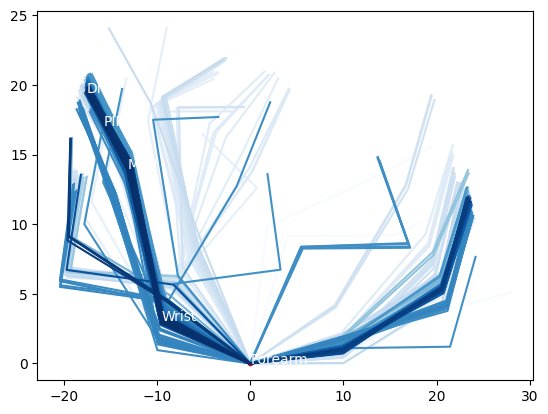

In [22]:
import matplotlib.colors as mcolors
# print(mcpAngle)

f_x = 0
f_y =0
w_x = np.zeros(len(mcpAngle))
w_y = np.zeros(len(mcpAngle))
m_x = np.zeros(len(mcpAngle))
m_y = np.zeros(len(mcpAngle))
p_x = np.zeros(len(mcpAngle))
p_y = np.zeros(len(mcpAngle))
d_x = np.zeros(len(mcpAngle))
d_y = np.zeros(len(mcpAngle))

cmap = plt.cm.Blues
point_size = 10
frames = 1000
def calcx(r, angle):
    r = r*10
    return r* np.cos(np.radians(angle))
def calcy(r, angle):
    r = r*10
    return r* np.sin(np.radians(angle))

for i in range(frames):
    w_x[i] = f_x + calcx(1,wristAngle[i])
    w_y[i] = f_y + calcy(1,wristAngle[i])

    m_x[i] = w_x[i] + calcx(1.15,mcpAngle[i])
    m_y[i] = w_y[i] + calcy(1.15,mcpAngle[i])

    p_x[i] = m_x[i] + calcx(0.4,pipAngle[i])
    p_y[i] = m_y[i] + calcy(0.4,pipAngle[i])

    d_x[i] = p_x[i] + calcx(0.3,pipAngle[i])
    d_y[i] = p_y[i] + calcy(0.3,pipAngle[i])

    normalized_index = i / (frames- 1)

    # Get the color for this frame
    color = cmap(normalized_index)

    plt.plot([f_x,w_x[i],m_x[i],p_x[i],d_x[i]],[ f_y,w_y[i],m_y[i],p_y[i],d_y[i]],color=color)
plt.scatter(w_x[i], w_y[i], s=point_size, color='red')
plt.scatter(m_x[i], m_y[i], s=point_size, color='red')
plt.scatter(p_x[i], p_y[i], s=point_size, color='red')
plt.scatter(d_x[i], d_y[i], s=point_size, color='red')
plt.scatter(f_x, f_y, s=point_size, color='red')
plt.text(w_x[i], w_y[i], "Wrist", fontsize=10, color='white')
plt.text(m_x[i], m_y[i], "MCP", fontsize=10, color='white')
plt.text(p_x[i], p_y[i], "PIP", fontsize=10, color='white')
plt.text(d_x[i], d_y[i], "DIP", fontsize=10, color='white')
plt.text(f_x, f_y, "Forearm", fontsize=10, color='white')


KeyboardInterrupt: 

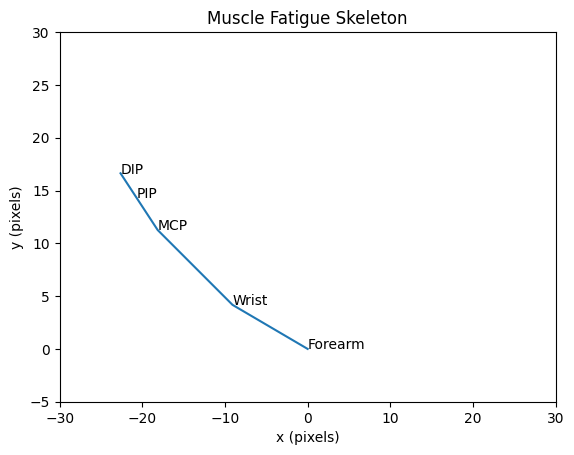

In [15]:
from matplotlib.animation import FFMpegWriter


angleName = ['DIP', 'PIP', 'MCP', 'Wrist', 'Forearm']
f_x = 0
f_y = 0
w_x = np.zeros(len(mcpAngle))
w_y = np.zeros(len(mcpAngle))
m_x = np.zeros(len(mcpAngle))
m_y = np.zeros(len(mcpAngle))
p_x = np.zeros(len(mcpAngle))
p_y = np.zeros(len(mcpAngle))
d_x = np.zeros(len(mcpAngle))
d_y = np.zeros(len(mcpAngle))

# Set up the writer object to write your video
writer = FFMpegWriter(fps=50)


# Create a figure for plotting
fig, ax = plt.subplots()


# Prepare the video file to write to
with writer.saving(fig, "muscleFatigueSkeleton.gif", 100):


   # Loop over your data to create each frame
   for i in range(800):
      x = data.iloc[i, 1::3]
      y = data.iloc[i, 2::3]
      # print(x)

      w_x[i] = f_x + calcx(1,wristAngle[i])
      w_y[i] = f_y + calcy(1,wristAngle[i])

      m_x[i] = w_x[i] + calcx(1.15,mcpAngle[i])
      m_y[i] = w_y[i] + calcy(1.15,mcpAngle[i])

      p_x[i] = m_x[i] + calcx(0.4,pipAngle[i])
      p_y[i] = m_y[i] + calcy(0.4,pipAngle[i])

      d_x[i] = p_x[i] + calcx(0.3,pipAngle[i])
      d_y[i] = p_y[i] + calcy(0.3,pipAngle[i])


   #    f = interp1d(x, y, kind='quadratic')
   #    x_smooth = np.linspace(min(x), max(x), 500)
   #    y_smooth = f(x_smooth)


      # Clear the previous plot
      ax.clear()

      # print([f_x,w_x[i],m_x[i],p_x[i],d_x[i]])
      # Plot the current frame's data
      # ax.plot(x,y)
      ax.plot([f_x,w_x[i],m_x[i],p_x[i],d_x[i]],[ f_y,w_y[i],m_y[i],p_y[i],d_y[i]])


      # Add any additional plot formatting here (e.g., titles, labels)

      ax.set_xlim(f_x-30, f_x+30)
      ax.set_ylim(f_y-5, f_y+30)
      # ax.set_xlim([x.iloc[-1]+500, x.iloc[-1]-500])
      # ax.set_ylim([y.iloc[-1]-100, y.iloc[0]+500])


      # for j, angle in enumerate(angleName):
         # ax.text(x.iloc[j], y.iloc[j], angle, fontsize=10)
      ax.text(w_x[i], w_y[i], "Wrist", fontsize=10)
      ax.text(m_x[i], m_y[i], "MCP", fontsize=10)
      ax.text(p_x[i], p_y[i], "PIP", fontsize=10)
      ax.text(d_x[i], d_y[i], "DIP", fontsize=10)
      ax.text(f_x, f_y, "Forearm", fontsize=10)
   
      ax.set_xlabel("x (pixels)")
      ax.set_ylabel("y (pixels)")
      ax.set_title("Muscle Fatigue Skeleton")


      # Write the current frame to the video
      writer.grab_frame()


KeyboardInterrupt: 

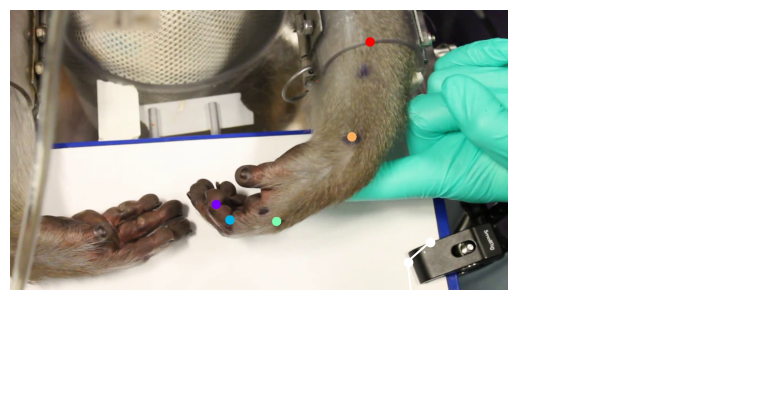

In [6]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Path to your video file
video_path = "Z:\Student Folders\Jake_Joseph\MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000_labeled.mp4"
video_path = "/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000_labeled.mp4"

# Open the video
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file")

# Set up the writer object to write your video
writer = FFMpegWriter(fps=30)


# Create a figure for plotting
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)


# Prepare the video file to write to
with writer.saving(fig, "muscleSkeleton.mp4", 100):
    i=0

    # Loop through each frame in the video
    while cap.isOpened()and i < 500:
        ret, frame = cap.read()  # Read the frame
        if ret:
            # Convert frame from BGR to RGB (for correct matplotlib colors)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Here, implement the logic to extract your points for the current frame
            forearm = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
            wrist = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
            mcp = (data.iloc[i][data.columns[7]], data.iloc[i][data.columns[8]])
            pip = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
            dip = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])

            # Unpack the points into x and y coordinates
            x = [forearm[0], wrist[0], mcp[0], pip[0], dip[0]]
            y = [forearm[1], wrist[1], mcp[1], pip[1], dip[1]]


            # Plotting on the frame
            # plt.figure(figsize=(10, 5))
            ax.imshow(frame_rgb)
            ax.plot(x, y, marker='o', c='white')  # Plot with white color for visibility
            # plt.scatter(x, y, c='red', s=40)  # Highlight points

            # Display the frame
            ax.axis('off')  # Turn off axis
            # plt.show()

                # Write the current frame to the video
            writer.grab_frame()

            ax.clear()

            # Increment the frame counter
            i += 1
        else:
            break

    # When everything done, release the video capture object
    cap.release()
    plt.close(fig)
    # cv2.destroyAllWindows()



53910 54000


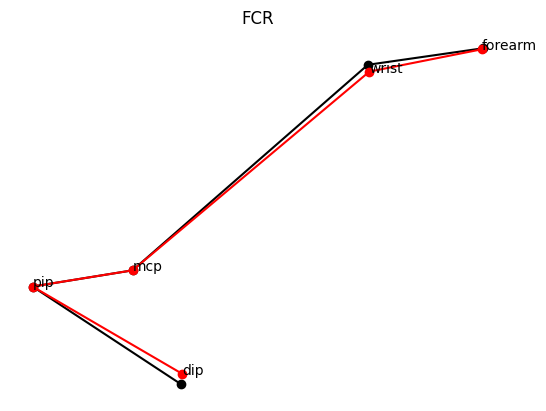

In [34]:
fps=30
secstart = 1797
secEnd = 1800
cmap = plt.cm.Reds
framestart = int(secstart * fps)
frameEnd = int(secEnd * fps)
print(framestart, frameEnd)
labels = [ "forearm","wrist","mcp", "pip", "dip"]
# slice = [x for x in range(framestart, frameEnd)]  #plot the entire range
slice = [framestart, frameEnd-1]  # Only plot the first and last index
color= ["black","r"]
for idx,i in enumerate(slice):
    # Here, implement the logic to extract your points for the current frame
    forearm = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    wrist = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    mcp = (data.iloc[i][data.columns[7]], data.iloc[i][data.columns[8]])
    pip = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    dip = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])

    # Unpack the points into x and y coordinates
    x = [ forearm[0],wrist[0],mcp[0], pip[0], dip[0]]
    y = [ forearm[1],wrist[1],mcp[1], pip[1], dip[1]]
    
    # normalized_index = (i - framestart) / (frameEnd - framestart)

    # Get the color for this frame
    # color = cmap(normalized_index)
    # Plotting on the frame
    plt.plot(x, y, marker='o', color=color[idx])  # Plot with white color for visibility
    # Add labels for the x, y points
for label, x_coord, y_coord in zip(labels, x, y):
    plt.text(x_coord, y_coord, label, fontsize=10, )
plt.axis('off')
plt.title("FCR")
plt.savefig("/home/jakejoseph/Desktop/figures/FCR.svg")
plt.show()


In [67]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
import pandas as pd
# Path to your video file
video_path = "/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/RhodesCharacterizationVideo.mp4"

# Open the video
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file")

# Determine FPS from the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Time slice
sec_start = 135
sec_end = 139

# Calculate start and end frames
frame_start = int(sec_start * fps)
frame_end = int(sec_end * fps)

# Set up the writer object to write your video
writer = FFMpegWriter(fps=fps)

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

# Prepare the video file to write to
with writer.saving(fig, "muscleSkeletonTimeSlice.mp4", 100):
    i = frame_start  # Start from the beginning of your time slice
    
    # Loop through each frame in the video within the time slice
    while cap.isOpened() and i < frame_end:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)  # Set the current frame position
        ret, frame = cap.read()  # Read the frame
        
        if ret:
            # Convert frame from BGR to RGB (for correct matplotlib colors)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Extract points for the current frame from your data
            forearm = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
            wrist = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
            mcp = (data.iloc[i][data.columns[7]], data.iloc[i][data.columns[8]])
            pip = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
            dip = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])

            # Unpack the points into x and y coordinates
            x = [forearm[0], wrist[0], mcp[0], pip[0], dip[0]]
            y = [forearm[1], wrist[1], mcp[1], pip[1], dip[1]]

            # Normalize the index for color mapping within the slice
            normalized_index = (i - frame_start) / (frame_end - frame_start)
            color = plt.cm.Reds(normalized_index)
            
            # Plotting on the frame
            ax.imshow(frame_rgb)
            ax.plot(x, y, marker='o', color=color)  # Use the calculated color
            
            # Turn off axis and write the frame
            ax.axis('off')
            writer.grab_frame()
            ax.clear()

            # Increment the frame counter
            i += 1
        else:
            break

    # Release the video capture object and close the plot
    cap.release()
    plt.close(fig)
